In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [14]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [15]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [16]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [17]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [18]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [19]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [20]:
# Complete Company dataset
label_encoder = preprocessing.LabelEncoder()
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [21]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])

In [22]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])

In [23]:
fraud['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [25]:
fraud['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [26]:
fraud['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [28]:
x = fraud.iloc[:,0:5]
y = fraud['Urban']

In [29]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [30]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [31]:
fraud['Urban'].unique()

array([1, 0])

In [32]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [33]:
# splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 40)

In [34]:
x_train

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
332,1,0,98240,84132,1
13,0,1,61830,86649,16
274,1,1,58451,112584,25
257,1,1,54747,31611,17
112,1,2,96355,193038,26
...,...,...,...,...,...
440,0,2,77312,170407,13
165,1,1,91304,38463,23
7,1,2,62774,131253,3
219,1,0,20604,26814,9


In [35]:
y_train

332    0
13     1
274    0
257    1
112    1
      ..
440    1
165    1
7      1
219    0
326    1
Name: Urban, Length: 480, dtype: int32

In [36]:
x_test

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
159,1,2,62209,28504,1
307,0,0,62873,31819,25
253,1,2,79869,77256,29
528,0,1,91488,172612,10
137,1,2,22773,115884,6
...,...,...,...,...,...
102,1,0,32662,91488,23
577,1,1,56166,52940,5
18,1,0,97957,59269,6
560,0,0,90444,182562,24


In [37]:
y_test

159    0
307    0
253    0
528    0
137    0
      ..
102    0
577    1
18     0
560    0
62     1
Name: Urban, Length: 120, dtype: int32

### Building Decision Tree Classifier using Entropy Criteria

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

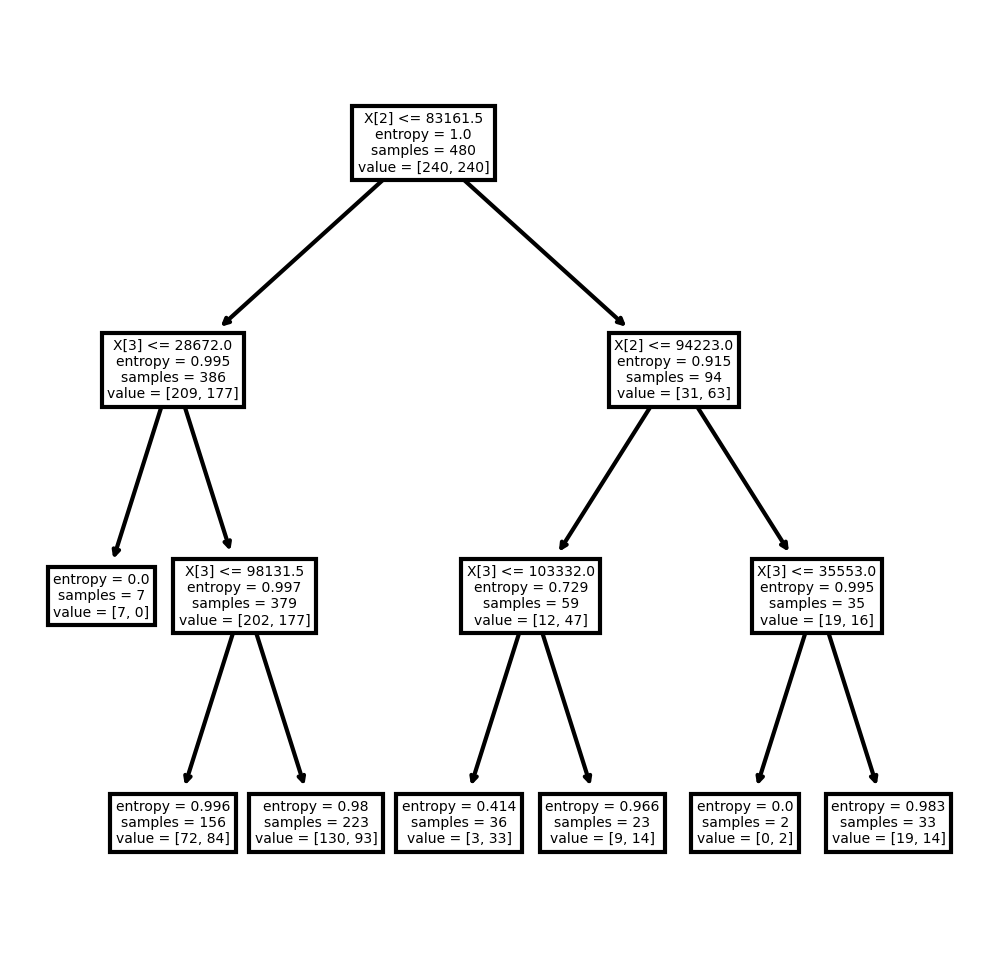

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
# plot the decision tree
tree.plot_tree(model);

In [41]:
# 0 label = No
# 1 label = Yes

# Predicting on test data
preds = model.predict(x_test) #predicting on test dataset
pd.Series(preds).value_counts() # getting the count of each category

0    64
1    56
dtype: int64

In [42]:
preds

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [43]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban,,
0,33,25
1,31,31


In [44]:
# Accuracy
np.mean(preds == y_test)

0.5333333333333333

### Building Decision Tree classifier (CART) Using GINI criteria

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [46]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
# Prediction and computing the accuracy
pred = model_gini.predict(x_test)
np.mean(preds == y_test)

0.5333333333333333

### Decision tree regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
array = fraud.values
X = array[:,0:4]
Y = array[:,4]

In [52]:
X

array([[     0,      2,  68833,  50047],
       [     1,      0,  33700, 134075],
       [     0,      1,  36925, 160205],
       ...,
       [     0,      0,  47334, 154058],
       [     1,      1,  98592, 180083],
       [     0,      0,  96519, 158137]], dtype=int64)

In [54]:
# Work.Experience column - Dependent Variable
Y

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0

In [55]:
# splitting data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state= 1)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(402, 4)
(198, 4)
(402,)
(198,)


In [57]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [58]:
model.score(X_train, Y_train)

1.0

In [59]:
# Find the accuracy
model.score(X_test, Y_test)

-1.0493448072459852